# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [26]:
#and how about importing ALL The fucking libraries right away ???

In [27]:
# import numpy and pandas

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt

# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [28]:
# Run this code:

pokemon = pd.read_csv('../../Module_1/Lab_29_Dataframe-Calculations/Pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [29]:
# Your code here:
pokemon.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [30]:
pokemon["Legendary"].value_counts().to_frame()

,count
Legendary,
False,735
True,65


In [31]:
legendary = pokemon["Legendary"].sum()
normal = len(pokemon["Legendary"]) - pokemon["Legendary"].sum()

print(f' Normal pokemons are {normal}, but the special pokemons are {legendary}')

 Normal pokemons are 735, but the special pokemons are 65


Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [32]:
mean_legendary = pokemon[pokemon["Legendary"] == True]["Total"].mean()
mean_normal = pokemon[pokemon["Legendary"] == False]["Total"].mean()

print(f"Legenday pokemons' total points mean is {mean_legendary}, and the others' is {mean_normal}")

Legenday pokemons' total points mean is 637.3846153846154, and the others' is 417.21360544217686


In [33]:
std_legendary = pokemon[pokemon["Legendary"] == True]["Total"].std()
std_normal = pokemon[pokemon["Legendary"] == False]["Total"].std()

print(f"Legenday pokemons' total points standard deviation is {std_legendary}, and the others' is {std_normal}")


Legenday pokemons' total points standard deviation is 60.93738905315344, and the others' is 106.76041745713005


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [34]:
legendary_points = pokemon[pokemon["Legendary"] == True]["Total"]
normal_points = pokemon[pokemon["Legendary"] == False]["Total"]

stats.ttest_ind(legendary_points, normal_points).pvalue

3.0952457469652825e-52

What do you conclude from this test? Write your conclusions below.

In [35]:
# Since the pvalue of the t-test is 0.000000000000000000000000000000000000000000000000000309524 
# So I aint know what conclusion I'm pulling, but whatever hypothesis we were testing is shit

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [36]:
pokemon["Type 1"].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all **other** Pokemon.

In [37]:
# water_pokemon = pokemon[pokemon["Type 1"] == "Water"].sum()

# water_pokemon = [i for i in pokemon["Type 1"] if pokemon["Type 1"] == "Water" ].sum()

# water_pokemon = pokemon.loc[(pokemon["Type 1"] == "Water")].sum()

# water_pokemon = pokemon[pokemon["Type 1"] == "Water"]["Water"].mean()

# water_pokemon = pokemon[pokemon["Type 1"] == "Water"]["Type 1"]

# water_pokemon = pokemon.groupby("Type 1").value_counts(["Water"])

# filter = ["Water"]
# dude = pokemon.loc[pokemon["Type 1"].isin(filter)].groupby('Type 1').sum()

# water_pokemon = pokemon[pokemon['Type 1'] == "Water", 'Type 1'].sum()

# water_pokemon = pokemon[pokemon.loc[pokemon['Type 1']=='Water']].sum()

water_pokemon = len(pokemon[pokemon["Type 1"]=="Water"])
water_pokemon


112

In [38]:
mean_water_points= pokemon.loc[pokemon['Type 1']=='Water']['Total'].mean()
mean_not_water_points=pokemon.loc[pokemon['Type 1']!='Water']['Total'].mean()

std_water_points= pokemon.loc[pokemon['Type 1']=='Water']['Total'].std()
std_not_water_points=pokemon.loc[pokemon['Type 1']!='Water']['Total'].std()

In [39]:
print(f'mean_water: {mean_water_points}; mean_not_water {mean_not_water_points}, std_water: {std_water_points}, std_not_water: {std_not_water_points}')

mean_water: 430.45535714285717; mean_not_water 435.85901162790697, std_water: 113.1882660643146, std_not_water: 121.0916823020807


Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

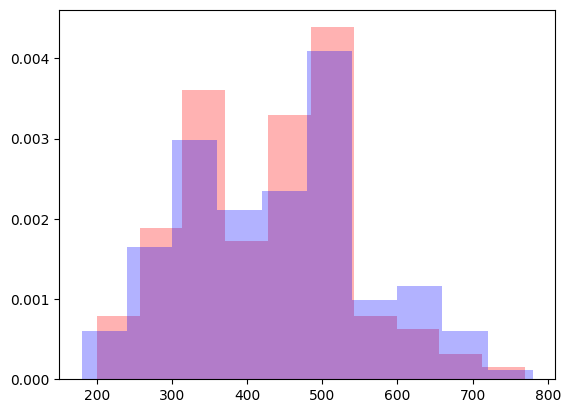

In [40]:
x = pokemon.loc[pokemon['Type 1']=='Water']['Total']
y = pokemon.loc[pokemon['Type 1']!='Water']['Total']

plt.hist(x, alpha = 0.3, color='red', density=True)
plt.hist(y, alpha = 0.3, color='blue', density=True)
plt.show()

In [41]:
stats.ttest_ind(x, y).pvalue

0.6587140317488793

Write your conclusion below.

In [42]:
# I've no clue what i'm doing.
# Just trying to get some outputs without any error code
# But the number is above the p-value treshold, so I can't reject whatever hypothesis there was to be made...

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores.  
##### Our hypothesis is that the defense and attack scores are equal.  
In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [50]:
import scipy
from scipy.stats import ttest_rel

In [44]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [45]:
total_defense = pokemon["Attack"]
total_attack = pokemon["Defense"]

stats.ttest_rel(total_defense,total_attack)

TtestResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05, df=799)

Describe the results of the test in the cell below.

In [46]:
#Still no clue.
# Pvalue is above treshold, so we cannot reject the hypothesis.
# The defense and attack might be correlated.

We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [68]:
stats.ttest_rel(pokemon["Sp. Atk"],pokemon["Sp. Def"])

TtestResult(statistic=0.853986188453353, pvalue=0.3933685997548122, df=799)

Describe the results of the test in the cell below.

In [ ]:
#Yeah, no. No idea what I'm doing.
# Anyways, "statistics" below 1. Pvalue above it's treshold, cool.
# So we cannot reject the hypothesis that there is a signficative difference between the means of Sp.Atck and Sp.Def

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack.  
**Test the hypothesis that the difference between the means is zero.**  
Confirm that the results of the test are the same.

In [72]:
stats.ttest_1samp((pokemon["Defense"]-pokemon["Attack"]), popmean=0)

TtestResult(statistic=-4.325566393330478, pvalue=1.7140303479358558e-05, df=799)

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [73]:
import pandas as pd

In [80]:
john = pd.crosstab(pokemon["Type 1"]=="Water", pokemon["Legendary"] )
john

Legendary,False,True
Type 1,,
False,627,61
True,108,4


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

In [81]:
chi2_contingency(john)



NameError: name 'chi2_contingency' is not defined

Based on a 95% confidence, should we reject the null hypothesis?

In [ ]:
# Your answer here:

